In [23]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import netCDF4
import matplotlib.patches as mpatches
import gsw
%matplotlib inline


In [2]:
sns.set_style('white')
sns.set_context('paper', font_scale=3)
sns.set_palette('hls', 4)
sns.set_style('ticks')

In [4]:
# static fields 
gp25 = "/g/data/v45/pas561/mom/archive/mom025_ocean_grid.nc"
grid_25  = netCDF4.Dataset(gp25)

for v in grid_25.variables: print("grid 25 variable:", v)

grid 25 variable: xt_ocean
grid 25 variable: yt_ocean
grid 25 variable: time
grid 25 variable: xu_ocean
grid 25 variable: yu_ocean
grid 25 variable: geolon_t
grid 25 variable: geolat_t
grid 25 variable: geolon_c
grid 25 variable: geolat_c
grid 25 variable: ht
grid 25 variable: hu
grid 25 variable: area_t
grid 25 variable: dxt
grid 25 variable: dyt
grid 25 variable: dxu
grid 25 variable: dyu
grid 25 variable: area_u
grid 25 variable: kmt
grid 25 variable: kmu
grid 25 variable: drag_coeff
grid 25 variable: f_coriolis
grid 25 variable: beta


In [8]:
dx_p25 = grid_25.variables['dxu']

area_p25 = grid_25.variables['area_u']

y_p25 = grid_25.variables['yu_ocean']
x_p25 = grid_25.variables['xu_ocean']

print(dx_p25.shape,area_p25.shape,np.ma.is_masked(y_p25))

(1080, 1440) (1080, 1440) False


In [9]:
fp25 = "/g/data/v45/pas561/mom/archive/wombat_jun16z_cp/cntrl.ocean.90to95.ncra.nc"

In [10]:
dsp25  = netCDF4.Dataset(fp25)

In [11]:
for v in dsp25.variables: print("p25 variable:", v)

p25 variable: xt_ocean
p25 variable: yt_ocean
p25 variable: st_ocean
p25 variable: st_edges_ocean
p25 variable: Time
p25 variable: nv
p25 variable: xu_ocean
p25 variable: yu_ocean
p25 variable: sw_ocean
p25 variable: sw_edges_ocean
p25 variable: grid_xt_ocean
p25 variable: grid_yu_ocean
p25 variable: potrho
p25 variable: potrho_edges
p25 variable: temp
p25 variable: salt
p25 variable: u
p25 variable: v
p25 variable: w
p25 variable: pot_rho_0
p25 variable: dzt
p25 variable: tx_trans
p25 variable: ty_trans_rho
p25 variable: ty_trans
p25 variable: ty_trans_rho_gm
p25 variable: ty_trans_gm
p25 variable: hblt
p25 variable: diff_cbt_t
p25 variable: sea_level
p25 variable: mld
p25 variable: pbot_t
p25 variable: average_T1
p25 variable: average_T2
p25 variable: average_DT
p25 variable: Time_bounds


In [12]:
rho0 = 1035.0 
rho_p25 = dsp25.variables['potrho']
print(rho_p25,np.ma.is_masked(rho_p25))

<class 'netCDF4._netCDF4.Variable'>
float64 potrho(potrho)
    long_name: potential density
    units: kg/m^3
    cartesian_axis: Z
    positive: down
    edges: potrho_edges
unlimited dimensions: 
current shape = (80,)
filling on, default _FillValue of 9.969209968386869e+36 used False


In [13]:
vmo_p25  = np.squeeze(dsp25.variables['ty_trans_rho'],axis=0)
print(vmo_p25.shape,np.ma.is_masked(vmo_p25))

(80, 1080, 1440) False


In [14]:
vmo_p25  = np.ma.masked_less(vmo_p25,-1e14)
print(vmo_p25.shape,np.ma.is_masked(vmo_p25))

(80, 1080, 1440) True


In [ ]:
#I think this is for Gold - v on rho levels
#vo_p25  = np.squeeze(dsp25.variables['v'],axis=0)
#print(vmo_p25.shape,np.ma.is_masked(vmo_p25))


In [20]:
fieldA = np.sum(vmo_p25,axis=2)
psi_p25 = (np.cumsum(fieldA,axis=0))# - np.sum(fieldA,axis=0))/1e9 + 0.1  
print(psi_p25.shape)

(80, 1080)


In [21]:
levels_5_rho = np.arange(-30, 22.5, 5)

(1080,) (80,) (80, 1080)


<ipython-input-22-5b2d9fcdc428>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xcoord,ycoord,field,cmap='RdBu_r',linewidths=0.25,vmin=-30,vmax=30)


<Figure size 720x360 with 0 Axes>

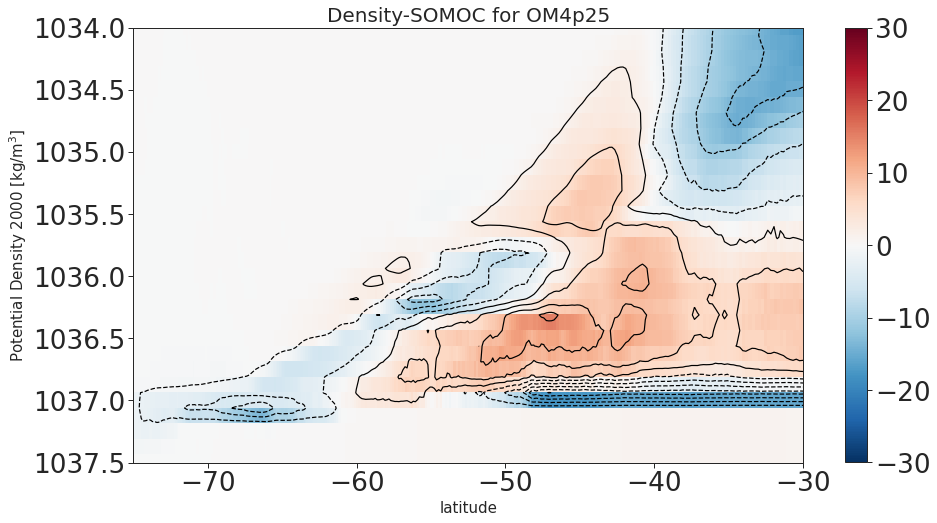

In [22]:
contours = [-30,-26,-22,-18,-14,-10,-6,-2,2,6,10,14,18,22,26,30]
myticks  = [-20,-15,-10,-5,0,5,10,15,20]

plt.figure(figsize=(10, 5)) 
fig, axis = plt.subplots(1,1, figsize=(15,8))
field = psi_p25
xcoord = y_p25
ycoord = rho_p25
print(xcoord.shape,ycoord.shape,field.shape)
xcoordmesh,ycoordmesh = np.meshgrid(xcoord,ycoord)

plt.pcolormesh(xcoord,ycoord,field,cmap='RdBu_r',linewidths=0.25,vmin=-30,vmax=30)
plt.colorbar()
plt.contour(xcoordmesh,ycoordmesh,field,contours,colors='k')

plt.xlim((-75,-30))
plt.ylim((1034,1037.5))
plt.gca().invert_yaxis()

axis.set_ylabel("Potential Density 2000 [kg/m$^3$]",fontsize=15)
axis.set_xlabel("latitude",fontsize=15)
axis.set_facecolor('gray')
axis.set_title("Density-SOMOC for OM4p25",fontsize=20)

plt.show()

#fig.savefig('./figures/somoc_density_OM4p25.png', bbox_inches='tight', dpi=300)

In [31]:
#calc sigma 2000m ref from temp and salt

#sigma_p25full = np.squeeze(ds_p25.variables['SIGMA2000_1988_2007'],axis=0)
#sigma_p25full = np.ma.masked_greater(np.absolute(sigma_p25full),1e10)
#sigma_p25 = np.mean(sigma_p25full,axis=2)
#zl_p25    = ds_p25.variables['Z_L']
#print(sigma_p25.shape,zl_p25)

#print(dsp25.variables['ty_trans_rho'].shape)
temp_p25  = np.squeeze(dsp25.variables['temp'],axis=0)
print(temp_p25.shape,np.ma.is_masked(temp_p25))
temp_p25  = np.ma.masked_less(temp_p25,-1e14)
print(temp_p25.shape,np.ma.is_masked(temp_p25))

salt_p25  = np.squeeze(dsp25.variables['salt'],axis=0)

salt_p25  = np.ma.masked_less(salt_p25,-1e14)
print(salt_p25.shape,np.ma.is_masked(salt_p25))


sigma_p25full = gsw.sigma2(salt_p25,temp_p25)
print(sigma_p25full.shape,np.ma.is_masked(sigma_p25full))

sigma_p25 = np.mean(sigma_p25full,axis=2)
print(sigma_p25.shape,np.ma.is_masked(sigma_p25))

#how to eliminate inversions?

(50, 1080, 1440) False
(50, 1080, 1440) True
(50, 1080, 1440) True
(50, 1080, 1440) True
(50, 1080) True


In [38]:
#Fig 20 plots the σ2 space overturning as a function of the time mean and zonal mean depth of the σ2 surfaces
#find the zonal mean depth of each rho surface in ty_trans_rho = zonal mean depth of potho surfaces
#end up with an 80 x 1080 array of depth of rho surfaces.
print(rho_p25[:])

for yr in range(0,80):
    

[1028.0625 1028.1875 1028.3125 1028.4375 1028.5625 1028.6875 1028.8125
 1028.9375 1029.0625 1029.1875 1029.3125 1029.4375 1029.5625 1029.6875
 1029.8125 1029.9375 1030.0625 1030.1875 1030.3125 1030.4375 1030.5625
 1030.6875 1030.8125 1030.9375 1031.0625 1031.1875 1031.3125 1031.4375
 1031.5625 1031.6875 1031.8125 1031.9375 1032.0625 1032.1875 1032.3125
 1032.4375 1032.5625 1032.6875 1032.8125 1032.9375 1033.0625 1033.1875
 1033.3125 1033.4375 1033.5625 1033.6875 1033.8125 1033.9375 1034.0625
 1034.1875 1034.3125 1034.4375 1034.5625 1034.6875 1034.8125 1034.9375
 1035.0625 1035.1875 1035.3125 1035.4375 1035.5625 1035.6875 1035.8125
 1035.9375 1036.0625 1036.1875 1036.3125 1036.4375 1036.5625 1036.6875
 1036.8125 1036.9375 1037.0625 1037.1875 1037.3125 1037.4375 1037.5625
 1037.6875 1037.8125 1037.9375]


In [ ]:
#contours = [-18,-16,-14,-12,-10,-8,-6,-4,-2,2,4,6,8,10,12,14,16,18]
contours = [-30,-26,-22,-18,-14,-10,-6,-2,2,6,10,14,18,22,26,30]
myticks  = [-20,-15,-10,-5,0,5,10,15,20]

plt.figure(figsize=(10, 5)) 
fig, axis = plt.subplots(1,1, figsize=(15,8))
field = psi_p25

ycoord = zrho_p25
zarray = np.ones(ycoord.shape)
xcoord = y_p25 * zarray
print(zarray.shape,xcoord.shape,ycoord.shape,field.shape)

plt.pcolormesh(xcoord,ycoord,field,cmap='RdBu_r',linewidths=5,vmin=-30,vmax=30)
#plt.contourf(xcoord,ycoord,field,contours,cmap='RdBu_r')
plt.colorbar()
plt.contour(xcoord,ycoord,field,contours,colors='k')


field = sigma_p25-1000
xcoordmesh,ycoordmesh = np.meshgrid(y_p25,zl_p25)
plt.contour(xcoordmesh,ycoordmesh,field,30,colors='g',vmin=33,vmax=40,linewidths=2)

#field = thk_p25
#plt.pcolormesh(xcoord,ycoord,field,cmap='RdBu_r',linewidths=5,vmin=-20,vmax=20)


plt.xlim((-75,-30))
plt.ylim((0,4500))
plt.gca().invert_yaxis()

axis.set_ylabel("Potential Density 2000 [kg/m$^3$]",fontsize=15)
axis.set_xlabel("latitude",fontsize=15)
axis.set_facecolor('gray')
axis.set_title("rho-SOMOC on Zrho for OM4p25",fontsize=20)

plt.show()

#fig.savefig('./figures/somoc_density_zrho_OM4p25.png', bbox_inches='tight', dpi=300)
